<a href="https://colab.research.google.com/github/Karlajack/MachineLearning2_Advance/blob/main/Week1_Project_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality-Reduction Week 1 project

## Background
This project aims to explore and apply feature Engineering and dimensionality reduction techniques on second-hand car sales datasets. The goal is to prepare the dataset for machine learning models by creating informative features and reducing the feature space while retaining essential information

1. **Introduction**

The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise

2. **Data Preprocessing**

In [100]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Load the dataset
df = pd.read_csv('/content/second_hand_cars.csv')
df.head(2)


,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN


**2.Data Cleaning**


dataframe.drop_duplicates(subset, keep, inplace, ignore_index)

In [6]:
# Checking and removing duplicate rows
df[df.duplicated()]
df.drop_duplicates(keep='first')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [8]:
df.isnull().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

In [66]:
# Imputing missing values with Mode
df['Variant'] = df['Variant'].fillna(df['Variant'].mode()[0])
df['Accessories'] = df['Accessories'].fillna(df['Accessories'].mode()[0])


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

**3. Feature Engineering**

In [67]:
#Creating new features  Age of car and Price Per Mile

df['Age'] = 2024 - df['Make Year']
df['Price_Per_Mile'] = df['Price'] / df['Mileage']

In [68]:
df.head(2)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Age,Price_Per_Mile
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",6,14.377571
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof,4,11.634364


In [69]:
#Separating categorical variables and numerical variables
Cat = df.select_dtypes(include=['object'])
Num = df.select_dtypes(include=['float64','int64'])

In [70]:
#Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
he = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output to False

for feature in Cat:
   # Reshape the 1D array to a 2D array before fitting and transforming
    reshaped_feature = df[feature].values.reshape(-1, 1)
    df[feature] = he.fit_transform(reshaped_feature)


In [64]:
df.head(2)


,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Owner Type,Registration Number,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Age,Price_Per_Mile
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,759107,0.0,0.0,0.0,1.0,0.0,0.0,6,14.377571
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505071,1.0,0.0,0.0,1.0,1.0,0.0,4,11.634364


In [71]:
#Separating Target and features
X= df.drop('Price', axis = 1)
y = df['Price']

In [72]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**4.Dimensionality Reduction**

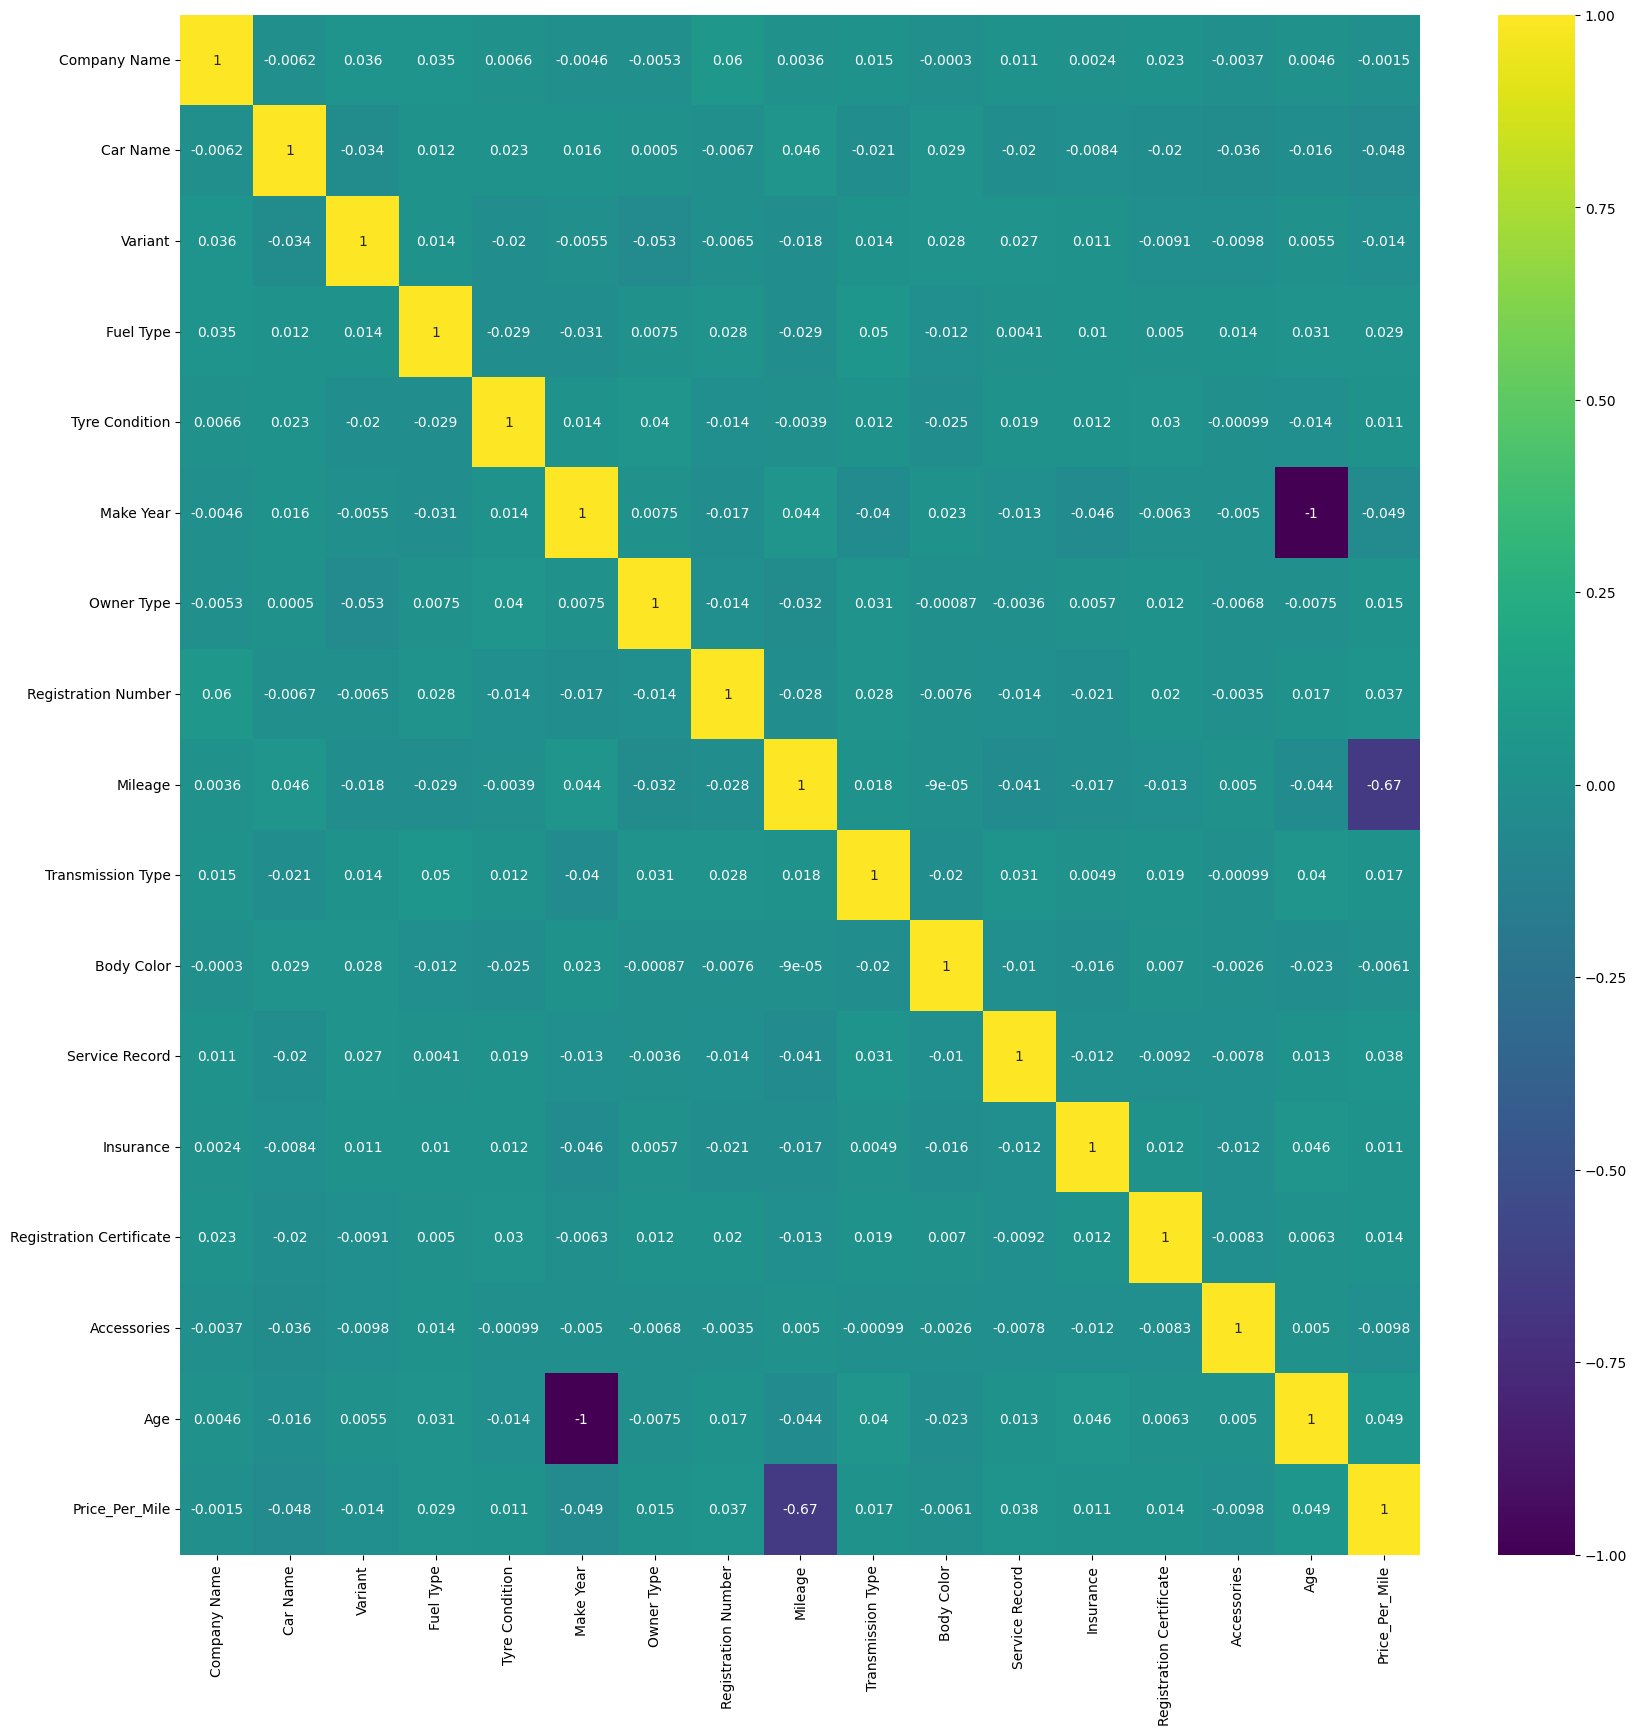

In [73]:
#Correlation Analysis
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="viridis")


In [74]:
# Removing highly correlated features
df=df.drop(columns=['Make Year','Mileage'],axis=1)

df.head(2)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Owner Type,Registration Number,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Age,Price_Per_Mile
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,759107,0.0,0.0,0.0,1.0,0.0,0.0,6,14.377571
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505071,1.0,0.0,0.0,1.0,1.0,0.0,4,11.634364


**Principal Component Analysis (PCA)**

In [75]:
X= df.drop('Price', axis = 1)
y = df['Price']

In [85]:
### Perform the PCA
pca = PCA(n_components = 3) # Number of components
pca_result = pca.fit_transform(X)

# Create a dataframe
pca_df = pd.DataFrame(data = pca_result, columns=['Pricipal Comp 1', 'Pricipal Comp 2','Pricipal Comp 3'])

pca_df.head(2)

,Pricipal Comp 1,Pricipal Comp 2,Pricipal Comp 3
0,4.682384,-1.459994,-0.055012
1,1.911604,0.496843,0.596915


In [92]:
pca_df['Price']= y
pca_df.head(2)

,Pricipal Comp 1,Pricipal Comp 2,Pricipal Comp 3,Price
0,4.682384,-1.459994,-0.055012,759107
1,1.911604,0.496843,0.596915,505071


### Explained Variance

In [86]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance:', explained_variance)

Explained variance: [0.92136312 0.0633912  0.00194482]


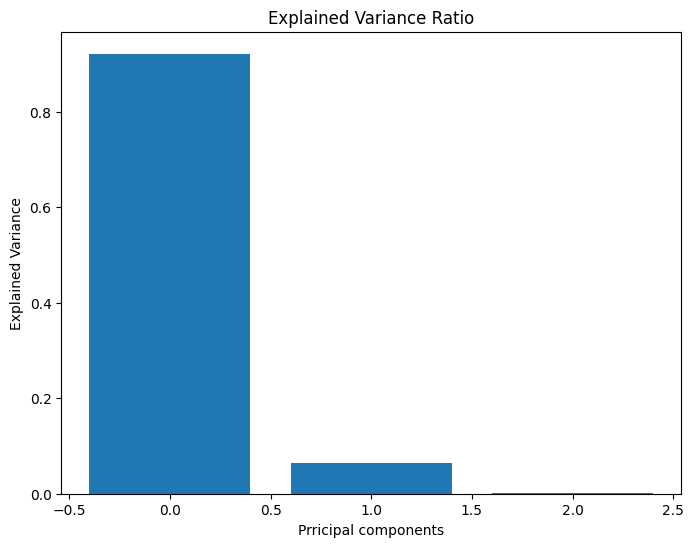

In [87]:
# Plot the explained Variance
plt.figure(figsize=(8,6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Prricipal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

### Choosing the number of components

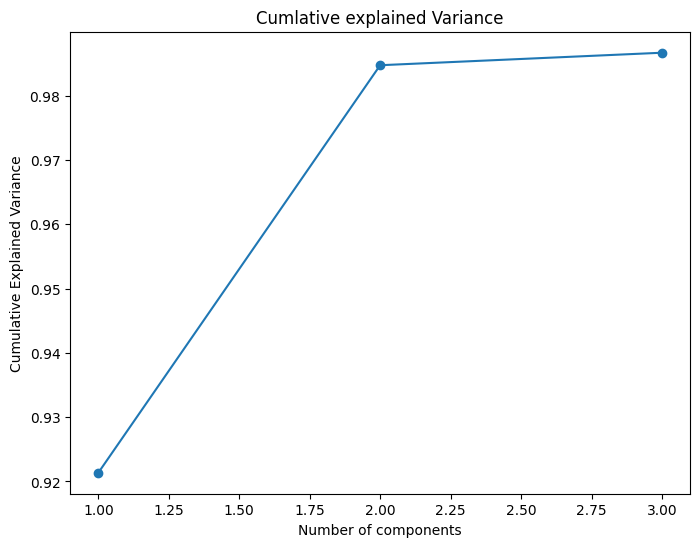

In [88]:
# Cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()

**5.Modeling and Evaluation**

In [93]:
x=pca_df.drop('Price',axis=1)
y=pca_df['Price']

In [108]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1750, 3) (750, 3) (1750,) (750,)


In [109]:
#LinearRegression
model = LinearRegression()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error: {mse}")

mean_squared_error: 47314861507.28244


In [123]:
# Ridge
model =Ridge(alpha=1000)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error: {mse}")


mean_squared_error: 47306699241.070885


In [122]:
# Lasso
model =Lasso(alpha=1000)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error: {mse}")

mean_squared_error: 47305071065.40996


In [124]:
## Choosing best model (with the optimal parameters) and fit it with the entire train dataset
model =Lasso(alpha=100).fit(X,y)